In [ ]:
### PRELIMINARY ATTEMPT TO SIMULATE ELECTRONICS RESPONSE ###
### ABANDONED CAUSE WE GOT REAL WORLD DATA BY THIS POINT AND NO LONGER NEEDED SIMULATIONS ###

In [38]:
import numpy as np
from numba import guvectorize
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [39]:
def genstep(time, start_time, timestep):
    start_step = int(start_time/timestep)
    ar1 = np.full(start_step, 0.0)
    ar2 = np.full(len(time) - start_step, 1.0)
    return np.concatenate((ar1, ar2))

In [53]:
@guvectorize(["(float64[:], float64, float64[:])"], "(n),()->(n)", nopython=True)
def polezero(w_in: np.ndarray, tau: float#, w_out: np.ndarray):
    ):
    tau = tau * 1e9 # convert from ms to ps steps (for out signals timestep is 0.001 ns)
    const = np.exp(-1 / tau)
    #w_out[0] = w_in[0]
    for i in range(1, len(w_in), 1):
        w_out[i] = w_out[i - 1] + w_in[i] - w_in[i - 1] * const
    


In [48]:
timestep = 0.001e-9
time_end = 15e-9
time = np.arange(0, time_end, timestep)
ns_time = time * 1e9
event_time = 5e-9

<class 'numpy.float64'>


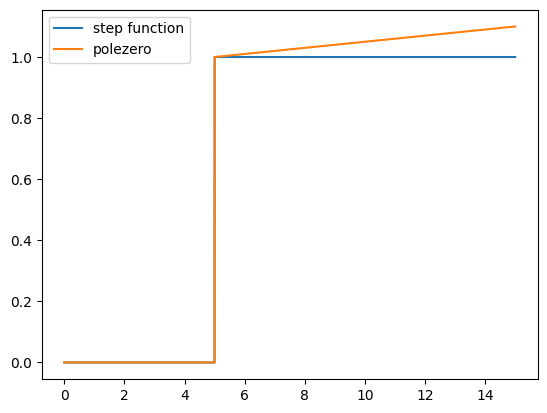

In [58]:
stepfn = genstep(time, event_time, timestep)
w_out = np.zeros(len(stepfn))
print(type(stepfn[0]))
polezero(stepfn, 1e-4, w_out)
plt.plot(ns_time, stepfn, label='step function')
plt.plot(ns_time, w_out, label='polezero')
plt.legend()
#plt.xlim(4,6)

